In [219]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.path.abspath(os.getcwd()))

import casadi as cd

In [220]:
def calc_g(x,y,weights):
    phi_1 = np.tanh(x*y)
    phi_2 = np.tanh(x**2)
    phi_3 = np.tanh(y**2)
    phi_4 = np.tanh(x)
    phi_5 = np.tanh(y)
    return -1 + weights[0] * phi_1 + weights[1] * phi_2 + weights[2] * phi_3 + weights[3] * phi_4 + weights[4] * phi_5

In [221]:
X,Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
gt_weight = np.array([0.6, 0.7,-0.4,0.4,-0.8])*1.3
G_gt = calc_g(X,Y,gt_weight)
gt_weight


array([ 0.78,  0.91, -0.52,  0.52, -1.04])

In [222]:
learned_weight = np.load('../Data/Reacher/weights_2.npy')
G_learned = calc_g(X,Y,learned_weight)

In [223]:
traj = np.load('../Data/Reacher/traj_2.npy')
traj_tip = traj[:,2:]
traj_raw = np.load('../Data/Reacher/traj_raw.npy')
traj_tip_raw = traj_raw[:,2:]

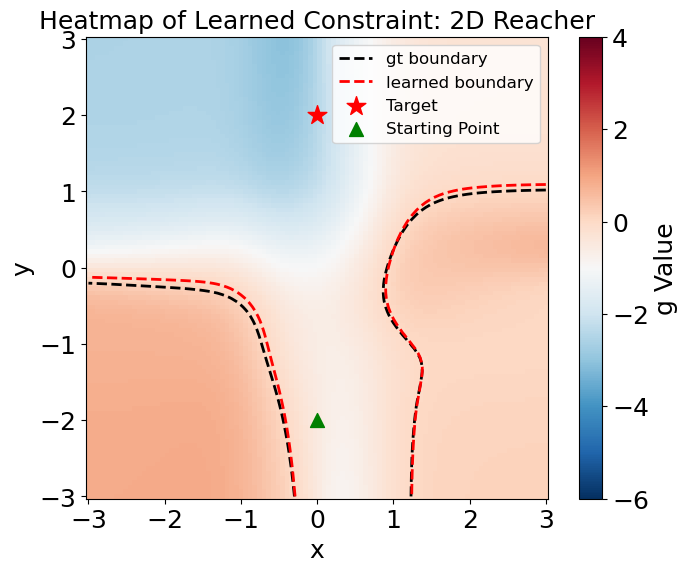

In [224]:
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.title('Heatmap of Learned Constraint: 2D Reacher', fontsize=18)
contour_gt = plt.contour(X, Y, G_gt, levels=[0.0], colors='black', linewidths=2, linestyles='dashed')
contour_learned = plt.contour(X, Y, G_learned, levels=[0.0], colors='red', linewidths=2, linestyles='dashed')
proxy_gt = plt.plot([],color='black', linewidth=2, linestyle='dashed',label='gt boundary')
proxy_learned = plt.plot([],color='red', linewidth=2, linestyle='dashed',label='learned boundary')
plt.gca().set_aspect('equal')
plt.pcolormesh( X, Y, G_learned, cmap='RdBu_r',vmin=-6,vmax=4)
cbar=plt.colorbar(label='Function Value')
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('g Value',size=18)
plt.scatter([0],[2],marker='*',s=200,c='red',label='Target')
plt.scatter([0],[-2],marker='^',s=100,c='green',label='Starting Point')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('../Data/Reacher/constraint.jpg')
plt.show()

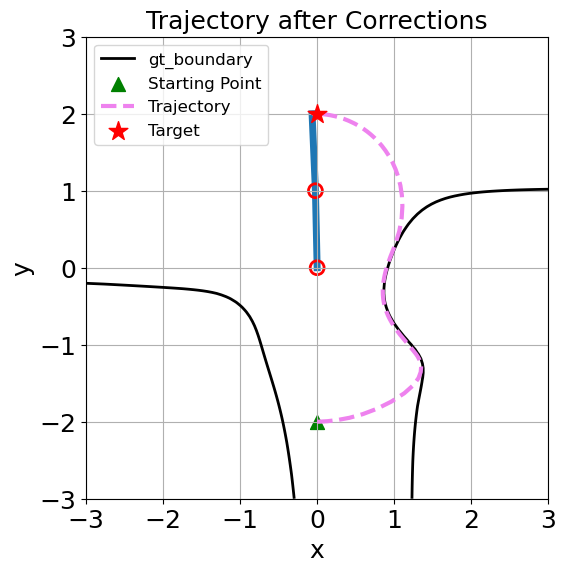

In [225]:
ref_points = traj[-25]
plt.figure(figsize=(6, 6))
plt.tight_layout()
plt.title('Trajectory after Corrections', fontsize=18)
plt.grid()
plt.gca().set_aspect('equal')
contour_gt = plt.contour(X, Y, G_gt, levels=[0.0], colors='black', linewidths=2, linestyles='solid')
proxy_gt = plt.plot([],color='black', linewidth=2, linestyle='solid',label='gt_boundary')
plt.plot([0,ref_points[0],ref_points[2]],[0,ref_points[1],ref_points[3]],linewidth=5,zorder=0)
plt.scatter([0,ref_points[0]],[0,ref_points[1]],s=100,facecolors='none', edgecolors='r',linewidth=2.0)
plt.scatter([0],[-2],marker='^',s=100,c='green',label='Starting Point')
plt.plot(traj_tip[:,0],traj_tip[:,1],linewidth=3,color='violet',linestyle='dashed',label='Trajectory')
plt.scatter([0],[2],marker='*',s=200,c='red',label='Target',zorder=5)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('../Data/Reacher/after.jpg')
plt.show()

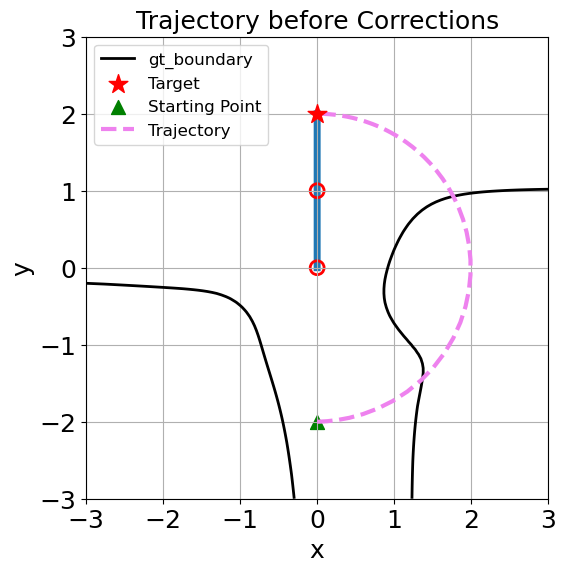

In [226]:
ref_points = traj_raw[-25]
plt.figure(figsize=(6, 6))
plt.tight_layout()
plt.title('Trajectory before Corrections', fontsize=18)
plt.grid()
plt.gca().set_aspect('equal')
contour_gt = plt.contour(X, Y, G_gt, levels=[0.0], colors='black', linewidths=2, linestyles='solid')
proxy_gt = plt.plot([],color='black', linewidth=2, linestyle='solid',label='gt_boundary')
plt.plot([0,ref_points[0],ref_points[2]],[0,ref_points[1],ref_points[3]],linewidth=5,zorder=0)
plt.scatter([0,ref_points[0]],[0,ref_points[1]],s=100,facecolors='none', edgecolors='r',linewidth=2.0)
plt.scatter([0],[2],marker='*',s=200,c='red',label='Target',zorder=5)
plt.scatter([0],[-2],marker='^',s=100,c='green',label='Starting Point')
plt.plot(traj_tip_raw[:,0],traj_tip_raw[:,1],linewidth=3,color='violet',linestyle='dashed',label='Trajectory')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('../Data/Reacher/before.jpg')
plt.show()

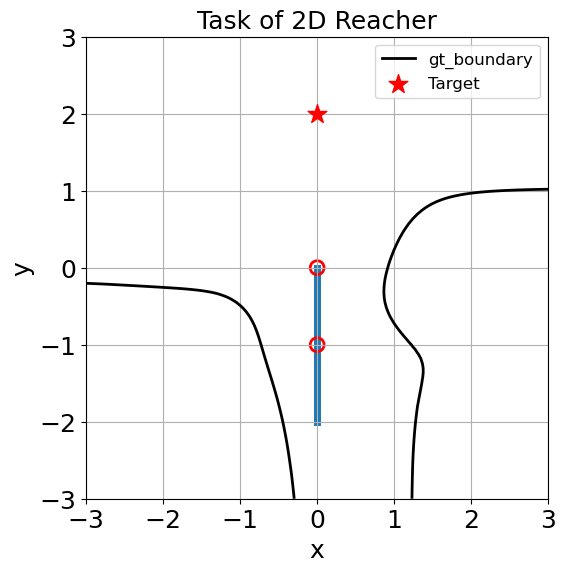

In [227]:
ref_points = traj_raw[0]
plt.figure(figsize=(6, 6))
plt.tight_layout()
plt.title('Task of 2D Reacher', fontsize=18)
plt.grid()
plt.gca().set_aspect('equal')
contour_gt = plt.contour(X, Y, G_gt, levels=[0.0], colors='black', linewidths=2, linestyles='solid')
proxy_gt = plt.plot([],color='black', linewidth=2, linestyle='solid',label='gt_boundary')
plt.plot([0,ref_points[0],ref_points[2]],[0,ref_points[1],ref_points[3]],linewidth=5,zorder=0)
plt.scatter([0,ref_points[0]],[0,ref_points[1]],s=100,facecolors='none', edgecolors='r',linewidth=2.0)
plt.scatter([0],[2],marker='*',s=200,c='red',label='Target',zorder=5)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('../Data/Reacher/task.jpg')
plt.show()